In [2]:
# 어휘 출현 빈도를 계수화하여 빈도수가 높거나 가능성있는 단어들만 반환하기

import nltk
import numpy as np
import pandas as pd
from nltk import word_tokenize, bigrams
nltk.download('punkt')

from nltk import ConditionalFreqDist

sentences = ['I love data science and deep learning', 'I love science', 'I know this code']
tokens = [word_tokenize(x) for x in sentences]
bgrams = [bigrams(x) for x in tokens]

token = []
for i in bgrams:
    token += ([x for x in i])

cfd = ConditionalFreqDist(token)
cfd.conditions()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bitcamp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['I', 'love', 'data', 'science', 'and', 'deep', 'know', 'this']

In [3]:
# 어휘 출현 빈도를 데이터프레임을 통해 확률을 나타내기
from nltk import ConditionalProbDist, MLEProbDist
cpd = ConditionalProbDist(cfd, MLEProbDist)

# 어휘 출현 빈도 확률은 행렬로 반환하기
prob_matrix = []

for i in cpd.keys():
    prob_matrix.append([cpd[i].prob(j) for j in cpd.keys()])

prob_matrix = np.array(prob_matrix) 

# 데이터 프레임으로 나타내기
df = pd.DataFrame(prob_matrix, index=cpd.keys(), columns=cpd.keys())

# 판다스 인접행렬을 불러오는 함수
import networkx as nx
G = nx.from_pandas_adjacency(df) 

중심성(Centrality) 지수

  - 연결망 분석에서 가장 많이 주목하는 속성은 중심성 지수이다
  - 중심성은 전체 연결망에서 중심에 위치하는 정도를 표현하는 지표로, 이를 분석하면 연결 정도, 중요도 등을 알 수 있음
  - 중심성 지수는 나타내는 특징에 따라 연결 중심성, 매개 중심성, 근접 중심성, 위세 중심성으로 구분

1. 연결 중심성(Degree Centrality)
  - 연결 중심성은 가장 기본적이고 직관적으로 중심성을 측정하는 지표
  - 텍스트에서 다른 단어와의 동시 출현 빈도가 많은 특정 단어는 연결 중심성이 높다고 볼 수 있음
  - 연결 정도로만 특정하면 연결망의 크기에 따라 달라져 비교가 어렵기 때문에 여러 방법으로 표준화
  - 주로 (특정 노드 i와 직접적으로 연결된 노드 수 / 노드 i와 직간접적으로 연결된 노드 수)로 계산
  - 여기서 직접적으로 연결된 노드는 서로 엣지 관계인 노드를 뜻하며, 간접적으로 연결된 노드는 서로 엣지 관계는 아니나 다른 노드와 엣지에 의해 도달할 수 있는 노드를 말함

In [4]:
# degree_centrality
nx.degree_centrality(G)  # 전체 노드들에 대해서 중심성에 대한 값이 반환된다.

{'I': 0.2857142857142857,
 'love': 0.42857142857142855,
 'data': 0.2857142857142857,
 'science': 0.42857142857142855,
 'and': 0.2857142857142857,
 'deep': 0.14285714285714285,
 'know': 0.2857142857142857,
 'this': 0.14285714285714285}

2. 위세 중심성(Eigenvector Centrality)
  - 위세 중심성은 연결된 상대 단어의 중요성에 가중치를 둠
  - 중요한 단어와 많이 연결됐다면 위세 중심성은 높아지게 됨
  - 위세 중심성은 고유 벡터로써 인접해있는 노드의 위세 점수와 관련되어 있어 직접 계산하기 쉽지 않음

In [5]:
# eigenvector_centrality
nx.eigenvector_centrality(G, weight='weight')

{'I': 0.13191159264681668,
 'love': 0.3377566652137744,
 'data': 0.4314616393016501,
 'science': 0.6062931741440789,
 'and': 0.48893772166574684,
 'deep': 0.272142657463379,
 'know': 0.035464710458317755,
 'this': 0.019741840331319403}

3. 근접 중심성(Closeness Centrality)
  - 근접 중심성은 한 단어가 다른 단어에 얼마나 가깝게 있는지를 측정하는 지표
  - 직접적으로 연결된 노드만 측정하는 연결 중심성과는 다르게, 근접 중심성은 직간접적으로 연결된 모든 노드들 사이의 거리를 측정
  - 근접 중심성을 측정하기 위해선 계산하는 식 = (모든 노드 수 -1 / 특정 노드 i에서 모든 노드에 이르는 최단 경로 수를 모두 더한 수)

In [6]:
# closeness_centrality
nx.closeness_centrality(G, distance='weight')

{'I': 0.7000000000000002,
 'love': 0.8076923076923077,
 'data': 0.6,
 'science': 0.7241379310344828,
 'and': 0.5121951219512195,
 'deep': 0.35593220338983056,
 'know': 0.6176470588235294,
 'this': 0.40384615384615385}

4. 매개 중심성(Betweeness Centrality)
  - 매개 중심성은 한 단어가 단어들과의 연결망을 구축하는데 얼마나 도움을 주는지 측정하는 지표
  - 매개 중심성이 높은 단어는 빈도 수가 작더라도 단어 간 의미부여 역할이 크기 때문에, 해당 단어를 제거하면 의사소통이 어려워짐
  - 매개 중심성은 모든 노드 간 최단 경로에서 특정 노드가 등장하는 횟수로 측정하며, 표준화를 위해 최댓값인 (N-1) X (N-2) / 2 로 계산

In [7]:
# current_flow_betweeness_centrality
nx.betweenness_centrality(G)

{'I': 0.47619047619047616,
 'love': 0.5714285714285714,
 'data': 0.0,
 'science': 0.47619047619047616,
 'and': 0.2857142857142857,
 'deep': 0.0,
 'know': 0.2857142857142857,
 'this': 0.0}

5. 페이지랭크(PageRank)
  - 월드 와이드 웹과 같은 하이퍼링크 구조를 가지는 문서에 상대적 중요도에 따라 가중치를 부여하는 방법
  - 이 알고리즘은 서로간에 인용과 참조로 연결된 임의의 묶음에 적용 가능
  - 페이지 랭크는 더 중요한 페이지는 더 많은 다른 사이트로부터 링크를 받는다는 관찰에 기초

In [8]:
nx.pagerank(G)

{'I': 0.0931436908263459,
 'love': 0.1354798195951489,
 'data': 0.11565510001171099,
 'science': 0.18340522340361387,
 'and': 0.15193026107501922,
 'deep': 0.08332015019674037,
 'know': 0.1333233751611287,
 'this': 0.10374237973029214}

중심성 지수 시각화

In [9]:
# 노드(words) 사이즈 계산 함수

def get_node_size(node_values):
    nsize = np.array([v for v in node_values])
    nsize = 1000 * (nsize - min(nsize)) / (max(nsize)- min(nsize))  # Minmaxscaler 적용
    
    return nsize

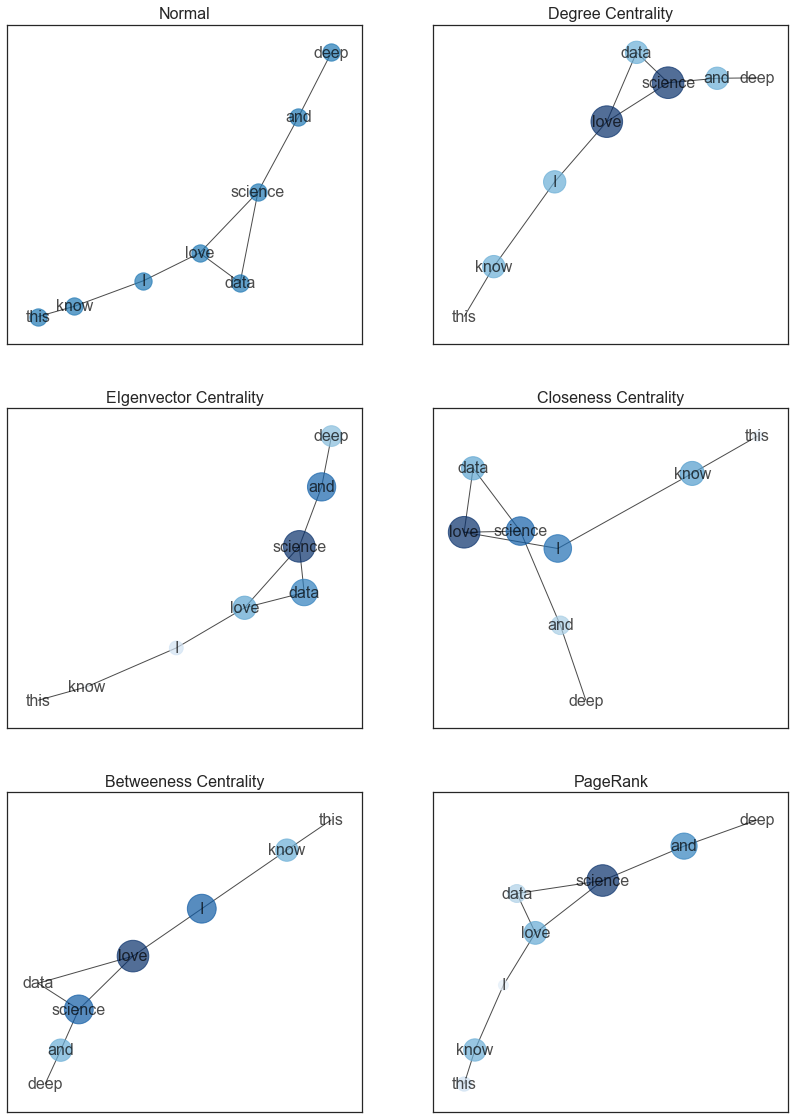

In [11]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

dc = nx.degree_centrality(G).values()
ec = nx.eigenvector_centrality(G, weight='weight').values()
cc = nx.closeness_centrality(G, distance='weight').values()
bc = nx.betweenness_centrality(G).values()
pr = nx.pagerank(G).values()


plt.figure(figsize=(14, 20))
plt.axis('off')

plt.subplot(321)
plt.title('Normal', fontsize=16)
nx.draw_networkx(G, font_size=16, alpha=0.7, cmap=plt.cm.Blues)

plt.subplot(322)
plt.title('Degree Centrality', fontsize=16)
nx.draw_networkx(G, font_size=16, node_color=list(dc),
                 node_size=get_node_size(dc),
                 alpha=0.7, cmap=plt.cm.Blues)

plt.subplot(323)
plt.title('EIgenvector Centrality', fontsize=16)
nx.draw_networkx(G, font_size=16, node_color=list(ec),
                 node_size=get_node_size(ec),
                 alpha=0.7, cmap=plt.cm.Blues)

plt.subplot(324)
plt.title('Closeness Centrality', fontsize=16)
nx.draw_networkx(G, font_size=16, node_color=list(cc),
                 node_size=get_node_size(cc),
                 alpha=0.7, cmap=plt.cm.Blues)

plt.subplot(325)
plt.title('Betweeness Centrality', fontsize=16)
nx.draw_networkx(G, font_size=16, node_color=list(bc),
                 node_size=get_node_size(bc),
                 alpha=0.7, cmap=plt.cm.Blues)

plt.subplot(326)
plt.title('PageRank', fontsize=16)
nx.draw_networkx(G, font_size=16, node_color=list(pr),
                 node_size=get_node_size(pr),
                 alpha=0.7, cmap=plt.cm.Blues)


# 중심에서 멀어질 수록 색깔이 옅어지고 단어를 가진 원의 크기가 작아진다.

그래프로 표현하기 위한 다양한 레이아웃 함수들

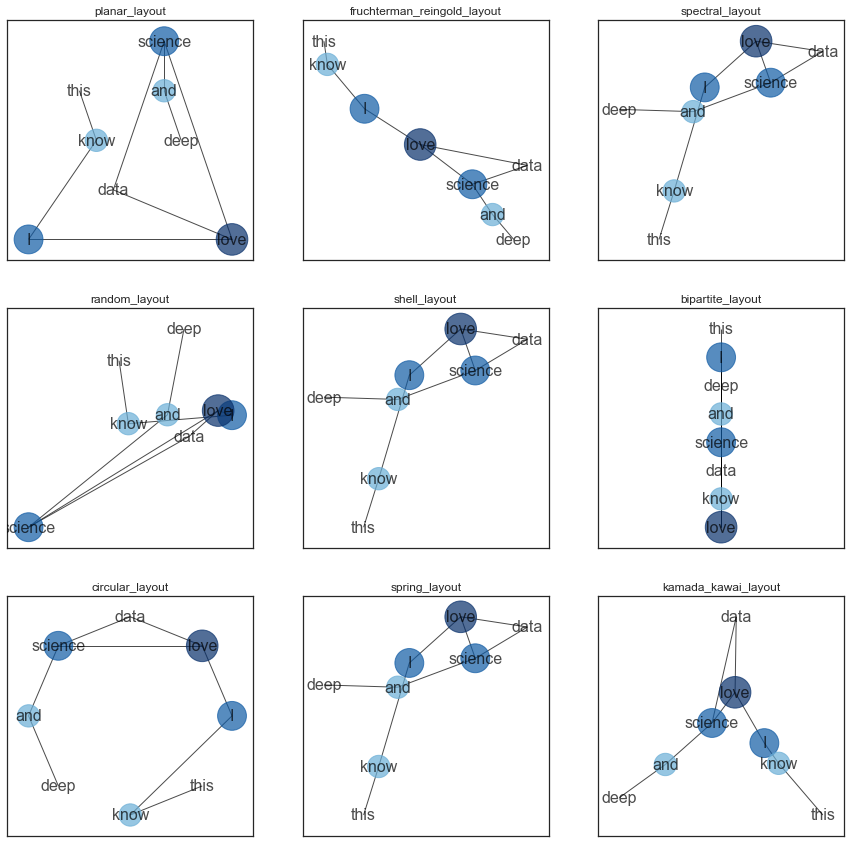

In [13]:
pl = nx.planar_layout(G)
frl = nx.fruchterman_reingold_layout(G)
sl = nx.spectral_layout(G)
rl = nx.random_layout(G)
sl = nx.shell_layout(G)
bl = nx.bipartite_layout(G, G.nodes())
cl = nx.circular_layout(G)
sl = nx.spring_layout(G)
kkl = nx.kamada_kawai_layout(G)

option = {
    'font_size' : 16,
    'node_color' : list(bc),
    'node_size' : get_node_size(bc),
    'alpha' : 0.7, 
    'cmap' : plt.cm.Blues
}

plt.figure(figsize=(15, 15))
plt.axis('off')

plt.subplot(331)
plt.title('planar_layout')
nx.draw_networkx(G, pos=pl, **option)

plt.subplot(332)
plt.title('fruchterman_reingold_layout')
nx.draw_networkx(G, pos=frl, **option)

plt.subplot(333)
plt.title('spectral_layout')
nx.draw_networkx(G, pos=sl, **option)

plt.subplot(334)
plt.title('random_layout')
nx.draw_networkx(G, pos=rl, **option)

plt.subplot(335)
plt.title('shell_layout')
nx.draw_networkx(G, pos=sl, **option)
plt.subplot(336)
plt.title('bipartite_layout')
nx.draw_networkx(G, pos=bl, **option)

plt.subplot(337)
plt.title('circular_layout')
nx.draw_networkx(G, pos=cl, **option)

plt.subplot(338)
plt.title('spring_layout')
nx.draw_networkx(G, pos=sl, **option)

plt.subplot(339)
plt.title('kamada_kawai_layout')
nx.draw_networkx(G, pos=kkl, **option)

plt.show()